In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt

In [12]:
def parse_log(_in):
    with open(_in) as f:
        res = json.load(f)

    new_res = []
    ids = []
    for k, v in res.items():
        for v_i in v:
            ids.append(int(k))
            new_res.append(v_i)
    return ids, new_res


In [13]:
ids, new_res = parse_log('bin/log')

In [19]:
df = pd.DataFrame(new_res, columns=['query', 'backbone', 'subject', 'bs_value', 'dS1', 'dS2'])
df['site'] = ids

df.head()

,query,backbone,subject,bs_value,dS1,dS2,site
0,NC_045512,EPI_ISL_412977,EPI_ISL_412977,0.0,0.055450,0.055450,0
1,NC_045512,EPI_ISL_412977,EPI_ISL_412977,0.0,0.054935,0.054935,3
2,NC_045512,EPI_ISL_412977,EPI_ISL_412977,0.0,0.054587,0.054587,6
3,NC_045512,EPI_ISL_412977,EPI_ISL_412977,0.0,0.054746,0.054746,9
4,NC_045512,EPI_ISL_412977,EPI_ISL_412977,0.0,0.064041,0.064041,12


In [8]:
keep_ = df[(df.dS1 > df.dS2) & (df.bs_value > 0.8)].site

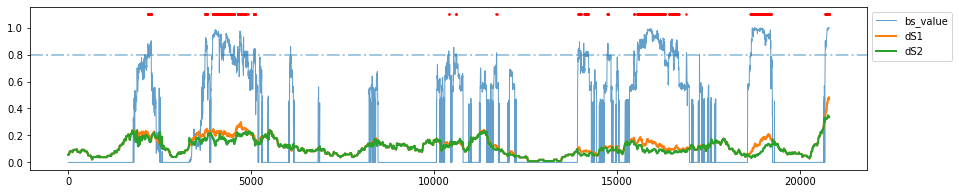

In [18]:
plt.figure(figsize=(15, 3))
plt.plot(df.site, df.bs_value, label='bs_value', linewidth=1, alpha=0.7)
plt.plot(df.site, df.dS1, label='dS1', linewidth=2)
plt.plot(df.site, df.dS2, label='dS2', linewidth=2)
plt.axhline(0.8, linewidth=2, alpha=0.4, linestyle='-.')
plt.scatter(x=keep_, y=[1.1]*len(keep_), s=2, c='r')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [20]:
ids_S, new_res_S = parse_log('./result/SARS-CoV-2.S.result')

In [26]:
df2 = pd.DataFrame(new_res_S, columns=['query', 'backbone', 'subject', 'bs_value', 'dS1', 'dS2'])
df2['site'] = ids_S
keep2_ = df2[(df2.dS1 > df2.dS2) & (df2.bs_value > 0.8)].site
df2.head()

,query,backbone,subject,bs_value,dS1,dS2,site
0,NC_045512,NA,emb|MN996532|,1.0,1.0,0.366931,0
1,NC_045512,NA,emb|MN996532|,1.0,1.0,0.365685,3
2,NC_045512,NA,emb|MN996532|,1.0,1.0,0.366931,6
3,NC_045512,NA,emb|MN996532|,1.0,1.0,0.380994,9
4,NC_045512,NA,emb|MN996532|,1.0,1.0,0.377249,12


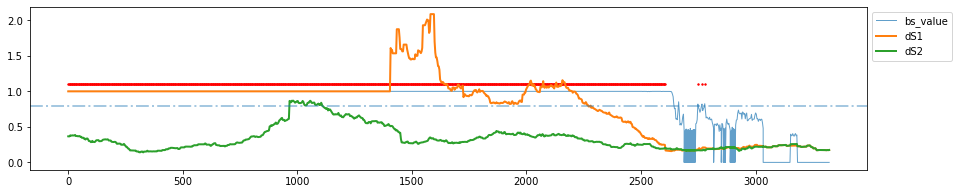

In [27]:
plt.figure(figsize=(15, 3))
plt.plot(df2.site, df2.bs_value, label='bs_value', linewidth=1, alpha=0.7)
plt.plot(df2.site, df2.dS1, label='dS1', linewidth=2)
plt.plot(df2.site, df2.dS2, label='dS2', linewidth=2)
plt.axhline(0.8, linewidth=2, alpha=0.4, linestyle='-.')
plt.scatter(x=keep2_, y=[1.1]*len(keep2_), s=2, c='r')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))